# 지도학습_다중회귀분석_고객별연간지출액예측

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [3]:
data = pd.read_csv('./data/ecommerce.csv')
data

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
# 결측치 탐지/처리와 중복값 확인
data.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [7]:
# 중복값이 없음
data[data.duplicated()]

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent


In [8]:
# 이상치 탐지 및 확인
data_num = data.select_dtypes(exclude='object')
data_num.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

<Axes: >

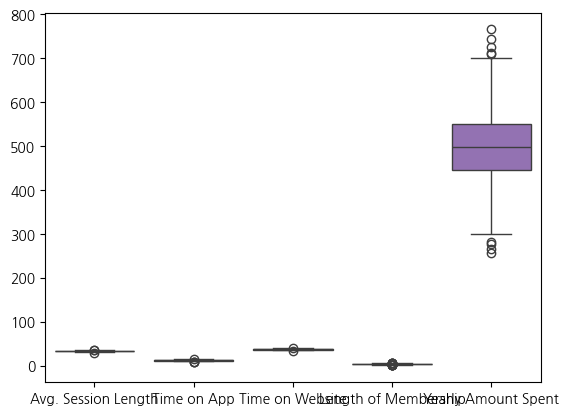

In [9]:
# 이상치 확인하기 위한 박스 플롯 확인
sns.boxplot(data_num)

============================== Avg. Session Length ==============================
count    500.000000
mean      33.053194
std        0.992563
min       29.532429
25%       32.341822
50%       33.082008
75%       33.711985
max       36.139662
Name: Avg. Session Length, dtype: float64



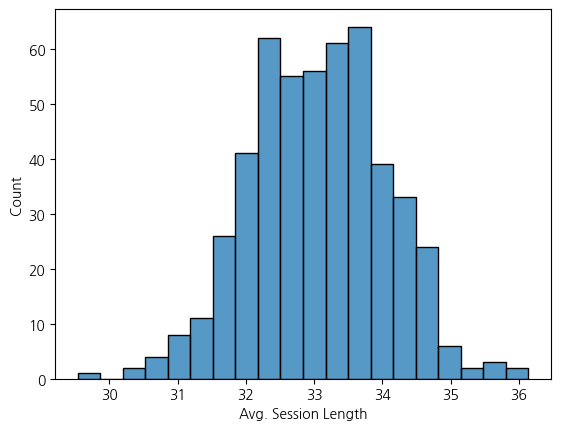

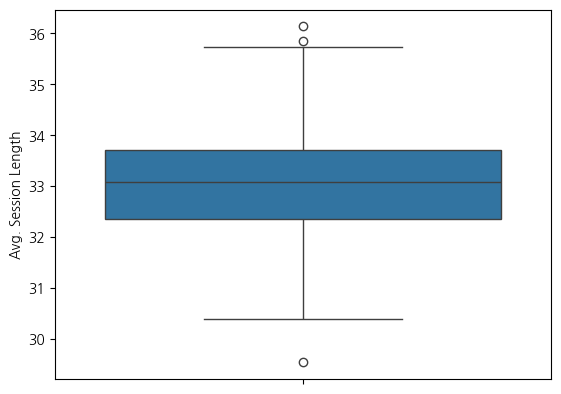


============================== Time on App ==============================
count    500.000000
mean      12.052488
std        0.994216
min        8.508152
25%       11.388153
50%       11.983231
75%       12.753850
max       15.126994
Name: Time on App, dtype: float64



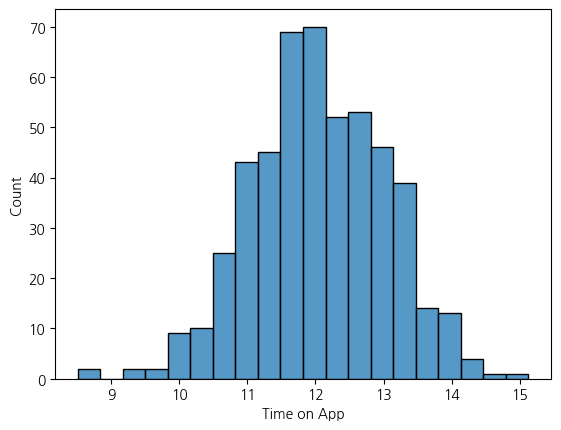

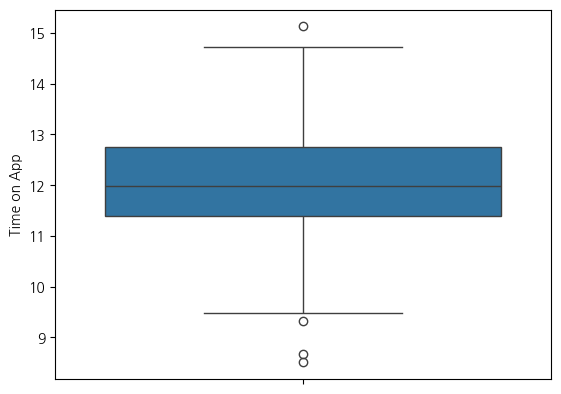


============================== Time on Website ==============================
count    500.000000
mean      37.060445
std        1.010489
min       33.913847
25%       36.349257
50%       37.069367
75%       37.716432
max       40.005182
Name: Time on Website, dtype: float64



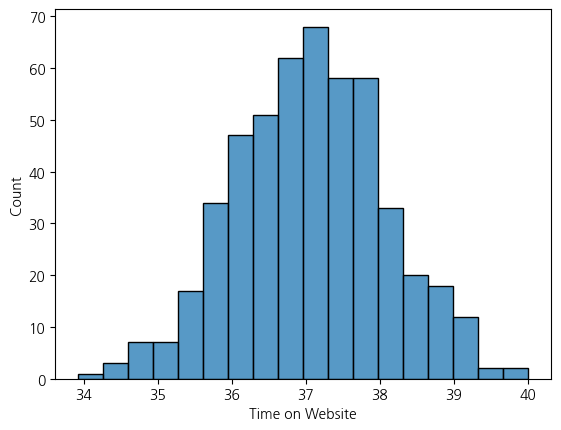

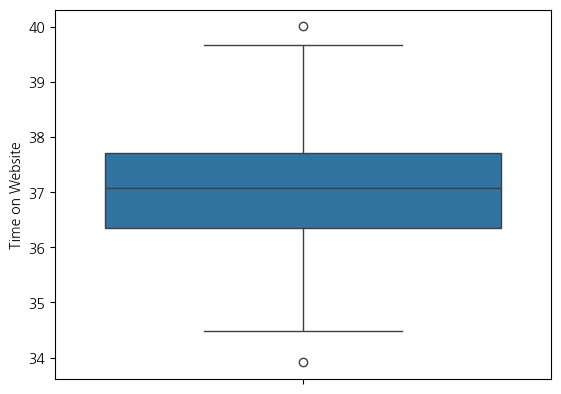


============================== Length of Membership ==============================
count    500.000000
mean       3.533462
std        0.999278
min        0.269901
25%        2.930450
50%        3.533975
75%        4.126502
max        6.922689
Name: Length of Membership, dtype: float64



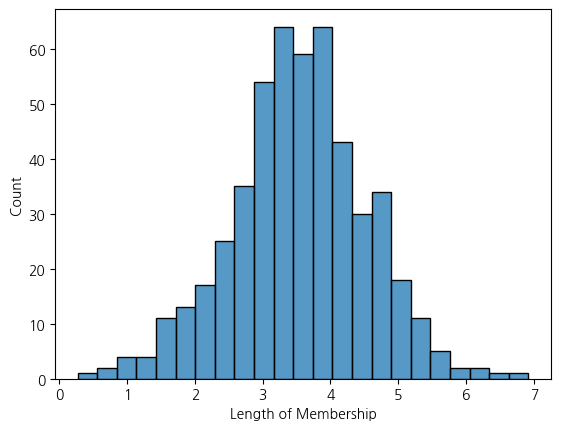

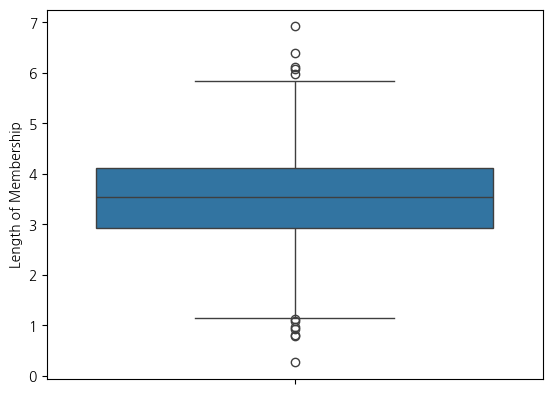


============================== Yearly Amount Spent ==============================
count    500.000000
mean     499.314038
std       79.314782
min      256.670582
25%      445.038277
50%      498.887875
75%      549.313828
max      765.518462
Name: Yearly Amount Spent, dtype: float64



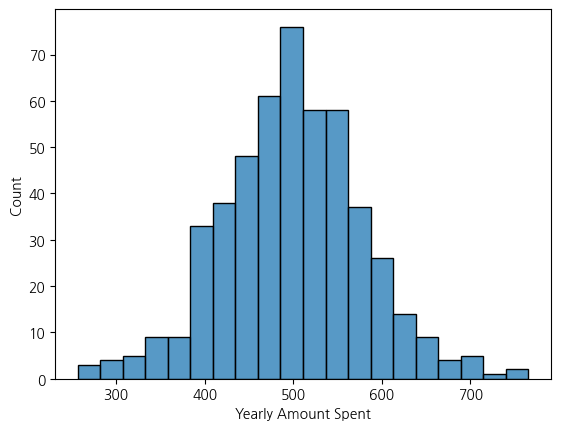

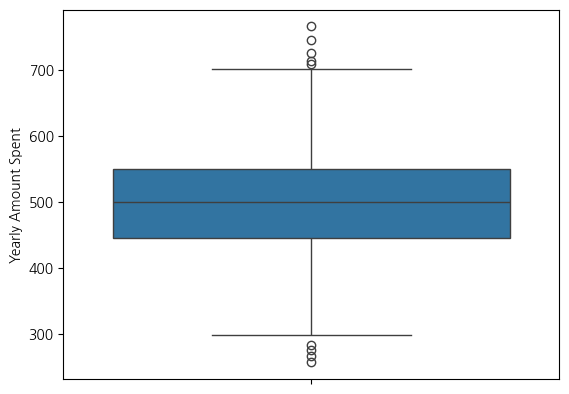

In [56]:
# 수치형 데이터 각 컬럼 확인
# 박스 플럿에서는 이상치 값이 보이지만 각 컬럼이 정규 분포로 고르게 분포되어 있으므로 이상치라고 보기는 어렵다
for col in data_num:
#     print(col)
    print('='*30, col,'='*30)
    print(data_num[col].describe(), end='\n\n')
    
    sns.histplot(data_num[col])
    plt.show()
    print()
    
    sns.boxplot(data_num[col])
    plt.show()
    print()
    

In [24]:
# 문자형 컬럼 확인
data_obj = data.select_dtypes(include='object')

============================== Email ==============================
Email의 unique 값의 수 : 500




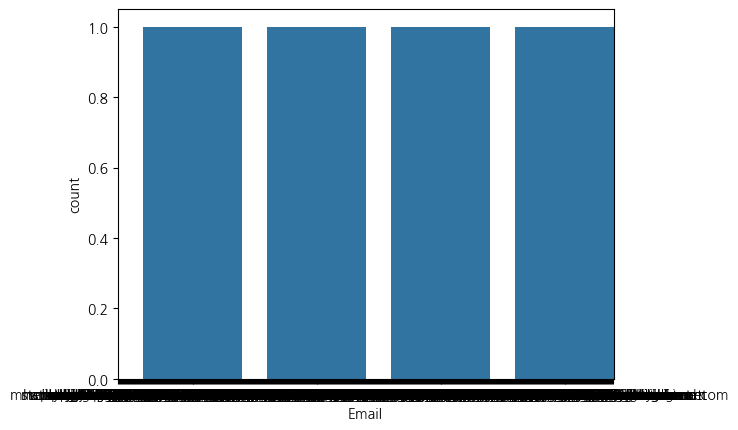


============================== Address ==============================
Address의 unique 값의 수 : 500




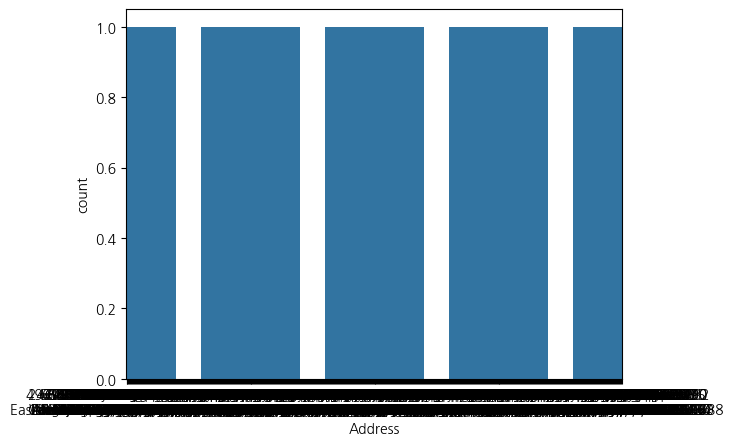


============================== Avatar ==============================
Avatar의 unique 값의 수 : 138




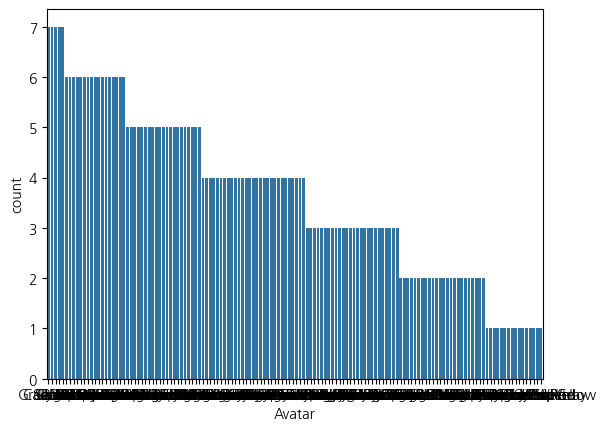

In [57]:
# 문자형 컬럼 구성 확인
for col in data_obj:
#     print(col)
    print('='*30, col,'='*30)
    print(f'{col}의 unique 값의 수 : {data_obj[col].nunique()}', end='\n\n')
    print()
    
    sns.barplot(data_obj[col].value_counts())
    plt.show()
    print()
    

<Axes: >

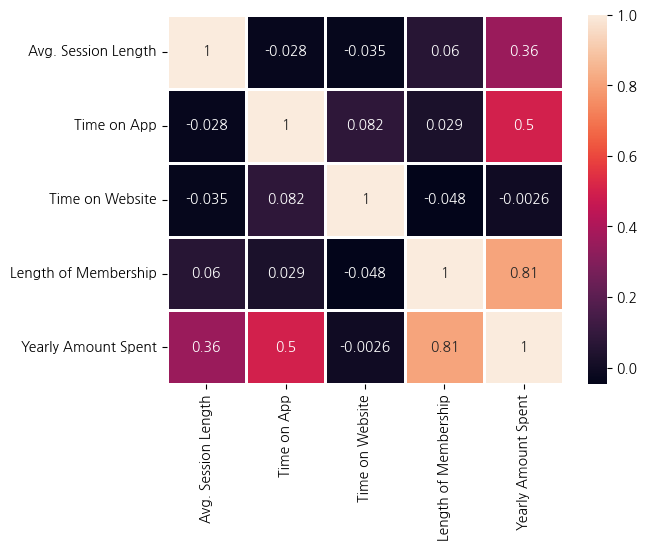

In [10]:
sns.heatmap(data_num.corr(), annot=True, linewidth=1)

# 회귀 모델 적용
- 데이터 홀드아웃, 스케일링, 분석

In [11]:
X = data.drop(['Yearly Amount Spent', 'Email', 'Address', 'Avatar'], axis=1)
y = data['Yearly Amount Spent']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## StandardScaler 적용

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
ss = StandardScaler()
ss.fit(X_train)
ss_X_train = ss.transform(X_train)
ss_X_test = ss.transform(X_test)

In [16]:
X_train = pd.DataFrame(ss_X_train, columns=X.columns, index=X_train.index)
X_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
249,0.728756,-0.140376,-0.173216,0.065197
433,1.233670,-0.235492,-0.700765,-1.413095
19,-0.449465,1.935961,0.166982,0.483620
322,0.206170,-1.328388,-0.860896,0.505068
332,0.084123,-0.321354,0.899668,-1.342230
...,...,...,...,...
106,-0.780032,0.133039,-0.854333,0.208220
270,0.958189,0.900460,1.607973,-0.284756
348,-1.265871,-1.173271,-2.088751,-0.428040
435,-0.812250,2.079565,0.002649,0.188979


In [17]:
X_test = pd.DataFrame(ss_X_test, columns=X.columns, index=X_test.index)
X_test

,Avg. Session Length,Time on App,Time on Website,Length of Membership
361,-0.997132,-1.713455,1.991749,-0.130046
73,-0.256010,0.761003,0.010579,0.276169
374,-1.635907,-1.960221,1.006187,0.652866
155,-0.620106,1.402969,0.214506,-0.610417
104,-1.694561,-1.065741,1.036687,-0.135598
...,...,...,...,...
347,0.718270,-0.754847,0.800082,1.529081
86,0.827716,0.460923,0.129021,-0.874853
75,-1.025263,0.180722,1.682520,-0.435901
438,-0.924682,-2.014653,0.158072,-0.032122


## 다중선형 회귀분석

In [18]:
# statsmodels의 python 문법
import statsmodels.api as sm
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

In [19]:
# 절편(상수)항 추가
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

In [20]:
X_train_const.head(2)

,const,Avg. Session Length,Time on App,Time on Website,Length of Membership
249,1.0,0.728756,-0.140376,-0.173216,0.065197
433,1.0,1.233670,-0.235492,-0.700765,-1.413095


In [21]:
X_test_const.head(2)

,const,Avg. Session Length,Time on App,Time on Website,Length of Membership
361,1.0,-0.997132,-1.713455,1.991749,-0.130046
73,1.0,-0.256010,0.761003,0.010579,0.276169


In [22]:
lr = sm.OLS(y_train, X_train_const).fit()
print(lr.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.985
Method:                  Least Squares   F-statistic:                     6676.
Date:                 Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                         10:26:27   Log-Likelihood:                -1480.1
No. Observations:                  400   AIC:                             2970.
Df Residuals:                      395   BIC:                             2990.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

- 다중회귀분석의 회귀식

- 설명력(Adj. R-squared) : 0.985(98.5%)의 설명력을 가진다
- Prob (F-statistic): 0.00 (0.05보다 작으므로 유의미한 컬럼들이라고 볼 수 있다)

# 회귀분석 지표
- MSE(Mean_squared_error) : 평균제곱오차 - 회귀선과 데이터 간의 오차
- RMSE(Root_Mean_squared_error) : 루트평균제곱오차 - 단위를 다시 원위치 시킨 오차

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
# 회귀 분석 모델로 예측
pred = lr.predict(X_test_const)

In [25]:
print('mean_squared_error: ',mean_squared_error(y_test, pred))
print('root_mean_squared_error: ',np.sqrt(mean_squared_error(y_test, pred)))

mean_squared_error:  109.8637411839406
root_mean_squared_error:  10.481590584636503


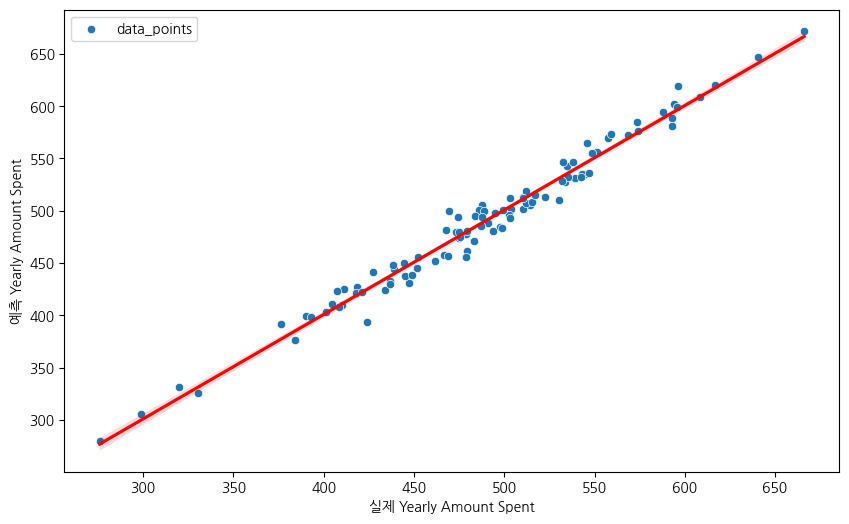

In [26]:
# 산점도와 회귀선 그리기
plt.figure(figsize=(10,6))
sns.scatterplot(x = y_test, y=pred, label='data_points')
sns.regplot(x=y_test, y=pred, scatter=False, label='regression line', color='red')
plt.xlabel('실제 Yearly Amount Spent')
plt.ylabel('예측 Yearly Amount Spent')
plt.show()

# R 문법으로 statsmodels 회귀분석

In [27]:
# import statsmodels.api as sm - 파이썬 방식
from statsmodels.formula.api import ols

In [28]:
# X_train

In [144]:
# X_test

In [29]:
# 과적합 방지 -> 제약조건 
train_data = pd.concat([X_train, y_train], axis=1)
train_data

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
249,0.728756,-0.140376,-0.173216,0.065197,518.786483
433,1.233670,-0.235492,-0.700765,-1.413095,434.144202
19,-0.449465,1.935961,0.166982,0.483620,605.061039
322,0.206170,-1.328388,-0.860896,0.505068,478.262126
332,0.084123,-0.321354,0.899668,-1.342230,424.202827
...,...,...,...,...,...
106,-0.780032,0.133039,-0.854333,0.208220,494.551861
270,0.958189,0.900460,1.607973,-0.284756,540.995739
348,-1.265871,-1.173271,-2.088751,-0.428040,392.810345
435,-0.812250,2.079565,0.002649,0.188979,571.216005


In [30]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
361,-0.997132,-1.713455,1.991749,-0.130046,401.033135
73,-0.256010,0.761003,0.010579,0.276169,534.777188
374,-1.635907,-1.960221,1.006187,0.652866,418.602742
155,-0.620106,1.402969,0.214506,-0.610417,503.978379
104,-1.694561,-1.065741,1.036687,-0.135598,410.069611
...,...,...,...,...,...
347,0.718270,-0.754847,0.800082,1.529081,593.156401
86,0.827716,0.460923,0.129021,-0.874853,487.379306
75,-1.025263,0.180722,1.682520,-0.435901,478.719357
438,-0.924682,-2.014653,0.158072,-0.032122,392.992256


In [31]:
train_data.columns = ['AvgSessionLength', 'TimeonApp', 'TimeonWebsite','LengthofMembership', 'YearlyAmountSpent']

In [32]:
test_data.columns = ['AvgSessionLength', 'TimeonApp', 'TimeonWebsite','LengthofMembership', 'YearlyAmountSpent']

In [33]:
model = ols('YearlyAmountSpent ~ AvgSessionLength + TimeonApp + TimeonWebsite + LengthofMembership', data=train_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      YearlyAmountSpent   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     6676.
Date:                Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                        10:33:16   Log-Likelihood:                -1480.1
No. Observations:                 400   AIC:                             2970.
Df Residuals:                     395   BIC:                             2990.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            501.9922      0

In [34]:
'+'.join(train_data.columns[:-1])

'AvgSessionLength+TimeonApp+TimeonWebsite+LengthofMembership'

In [35]:
model = ols('YearlyAmountSpent ~ ' + '+'.join(train_data.columns[:-1]), data=train_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      YearlyAmountSpent   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     6676.
Date:                Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                        10:33:21   Log-Likelihood:                -1480.1
No. Observations:                 400   AIC:                             2970.
Df Residuals:                     395   BIC:                             2990.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            501.9922      0

# 사이킷런을 이용한 회귀분석

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
slr = LinearRegression()
slr.fit(X_train, y_train)
pred3 = slr.predict(X_test)

print('mse: ',mean_squared_error(y_test, pred3))
print('rmse: ',np.sqrt(mean_squared_error(y_test, pred3)))

mse:  109.86374118394042
rmse:  10.481590584636495


In [168]:
# y 절편
print('y절편 =', slr.intercept_)

y절편 = 501.9921512124531


In [169]:
print('각 변수의 회귀 계수: ', slr.coef_)

각 변수의 회귀 계수:  [25.25038131 38.70350139  0.31546926 63.54321107]


In [170]:
print('각 변수의 이름: ', slr.feature_names_in_)

각 변수의 이름:  ['Avg. Session Length' 'Time on App' 'Time on Website'
 'Length of Membership']


In [172]:
model_coef = pd.DataFrame(dict(feature=slr.feature_names_in_, coef=slr.coef_))
model_coef

,feature,coef
0,Avg. Session Length,25.250381
1,Time on App,38.703501
2,Time on Website,0.315469
3,Length of Membership,63.543211


### $ R^2$ 값 출력

In [173]:
r2 = slr.score(X_test, y_test)
print('r2 = ', r2)

r2 =  0.9778130629184126


In [39]:
# result MSE / RMSE 표로 만들기 부분 추가